# **Tesla Stock Price Forecasting with Time Series Analysis**

### **Let's Begin**

#### **Importing all the necessary libraries**

In [289]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

#### **Importing dataset**

In [290]:
data=pd.read_csv("TSLA.csv")

In [291]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


#### **In this project, we will perform a Univariate Time Series Analysis**

In [292]:
stock_data=data[["Date","Close"]]

In [293]:
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


#### **Checking information of the data**

In [294]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


#### **Convert ‘Date’ feature into Date time data type using pandas**

In [295]:
stock_data["Date"]=pd.to_datetime(stock_data["Date"])

In [296]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


#### **Convert Date Column as Index Column**

In [298]:
stock_data=stock_data.set_index("Date")

In [353]:
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


## **Exploratory Data Analysis(EDA)**

#### **Statistical Description**

In [301]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


#### **Visualizing Trends for Closing Price**

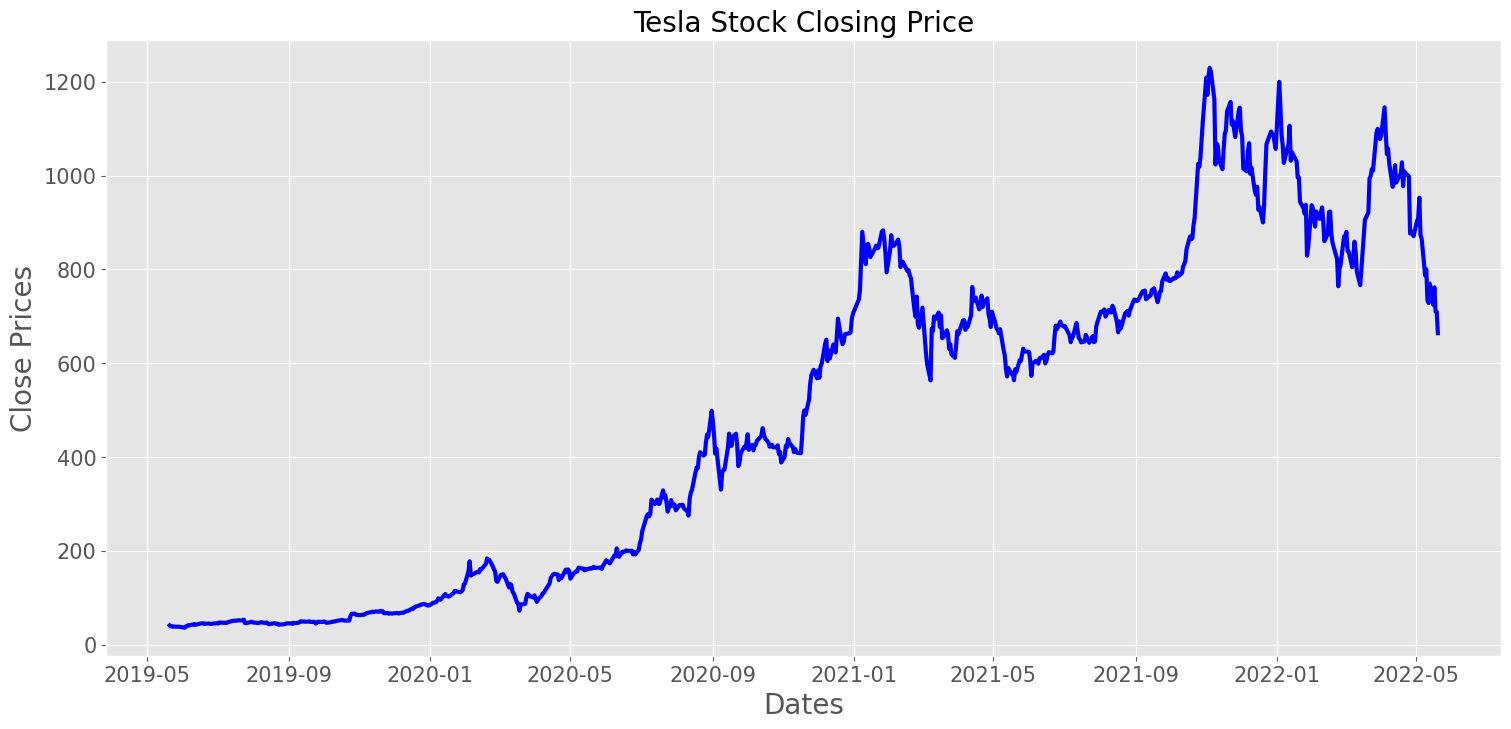

In [355]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 20)
plt.show()

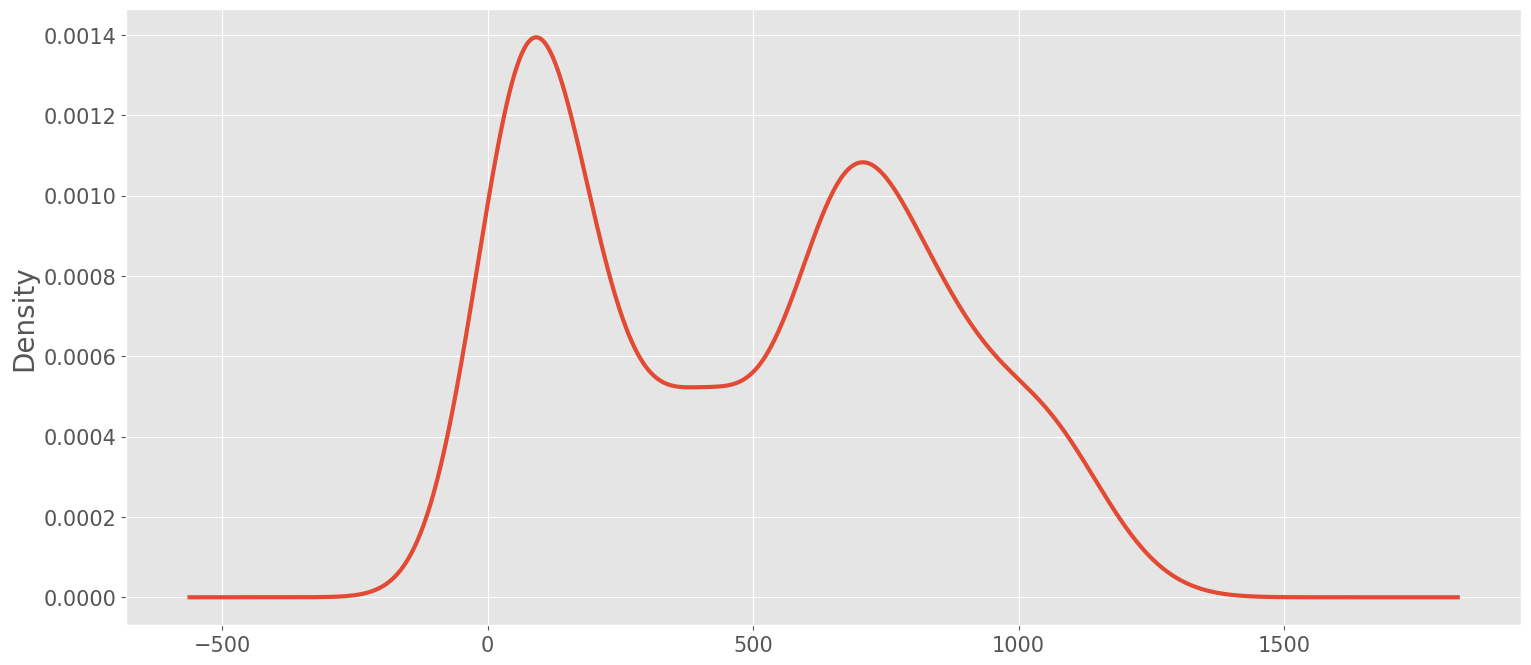

In [306]:
# Distribution of the close price
df_close = stock_data['Close']
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3)
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

#### **Identifying if Time Series Data is Stationary or Non-Stationary by testing Visualization based test and Statistics based test**

##### **Using Visualization Test**

In [307]:
# Moving Average
rolmean=stock_data["Close"].rolling(48).mean()

In [308]:
rolstd=stock_data["Close"].rolling(48).std()

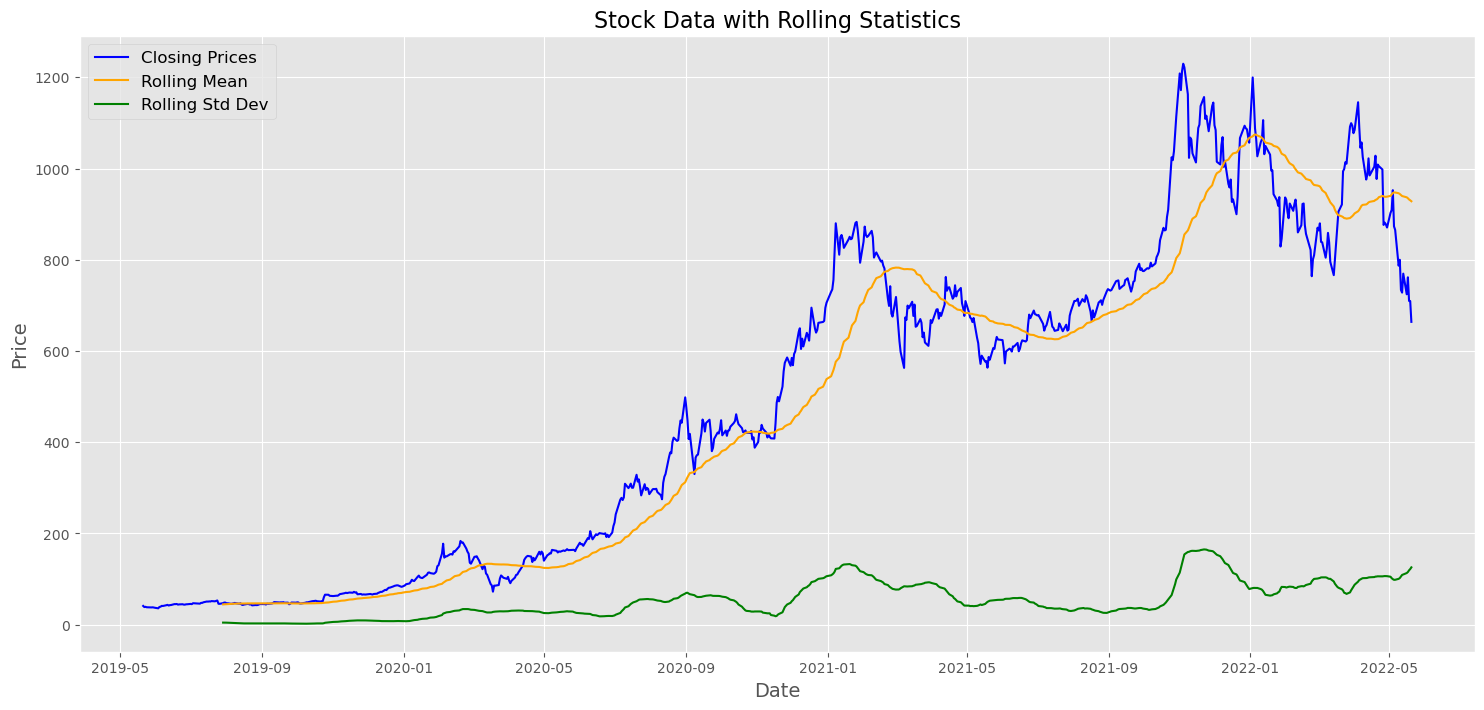

In [ ]:
plt.figure(figsize=(18, 8))

# Plot the closing prices
plt.plot(stock_data.Close, label='Closing Prices', color='blue')

# Plot the rolling mean
plt.plot(rolmean, label='Rolling Mean', color='orange')

# Plot the rolling standard deviation
plt.plot(rolstd, label='Rolling Std Dev', color='green')

# Add title and labels
plt.title('Stock Data with Rolling Statistics', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Add legend for clarity
plt.legend(loc='best', fontsize=12)

# Display the plot
plt.show()


#### **ADF(Augmented Decay-Fuller Test)**

In [310]:
#ADF(ada fullar test)
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data["Close"])

In [311]:
pd.Series(adft[0:4],index=["test stats","p-value","lag","data points"])

test stats      -1.363009
p-value          0.599876
lag              9.000000
data points    748.000000
dtype: float64

- The most important value is P-Value

In [312]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)


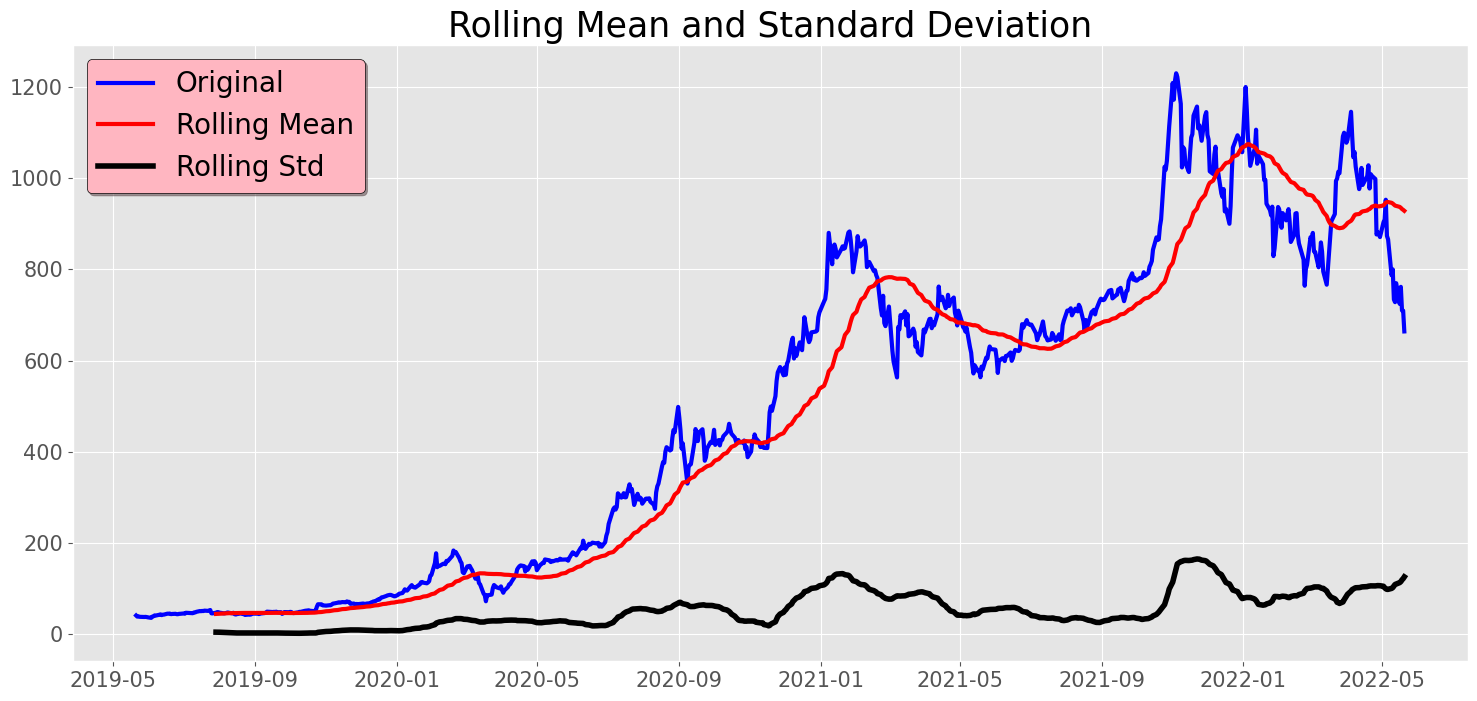

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [313]:
test_stationarity(stock_data.Close)

- From Visualization based test, we can see:
1. Data is following Upward trend 
2. Moving Average is not constant

- From ADF test, we can see p value is greater than 0.5

Hence, Time Series data is Non-Stationary and we will accept the null hypothesis

#### **Time Series Decomposition**

In [314]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12)

In [315]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 2000x1000 with 0 Axes>

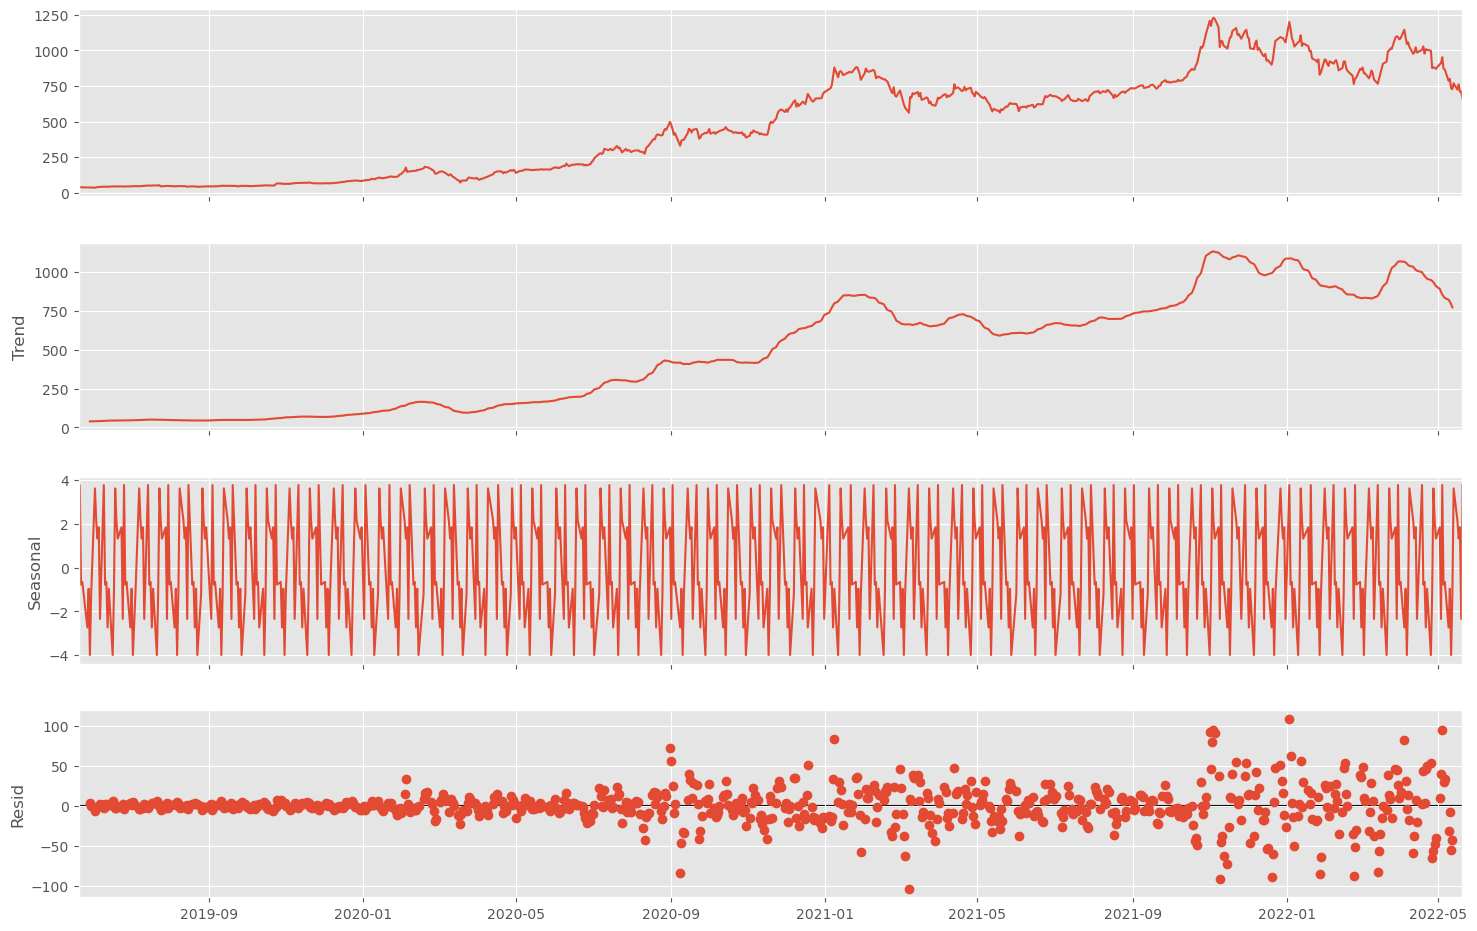

In [363]:
# Additive
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12,model="additive")

fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

<Figure size 2000x1000 with 0 Axes>

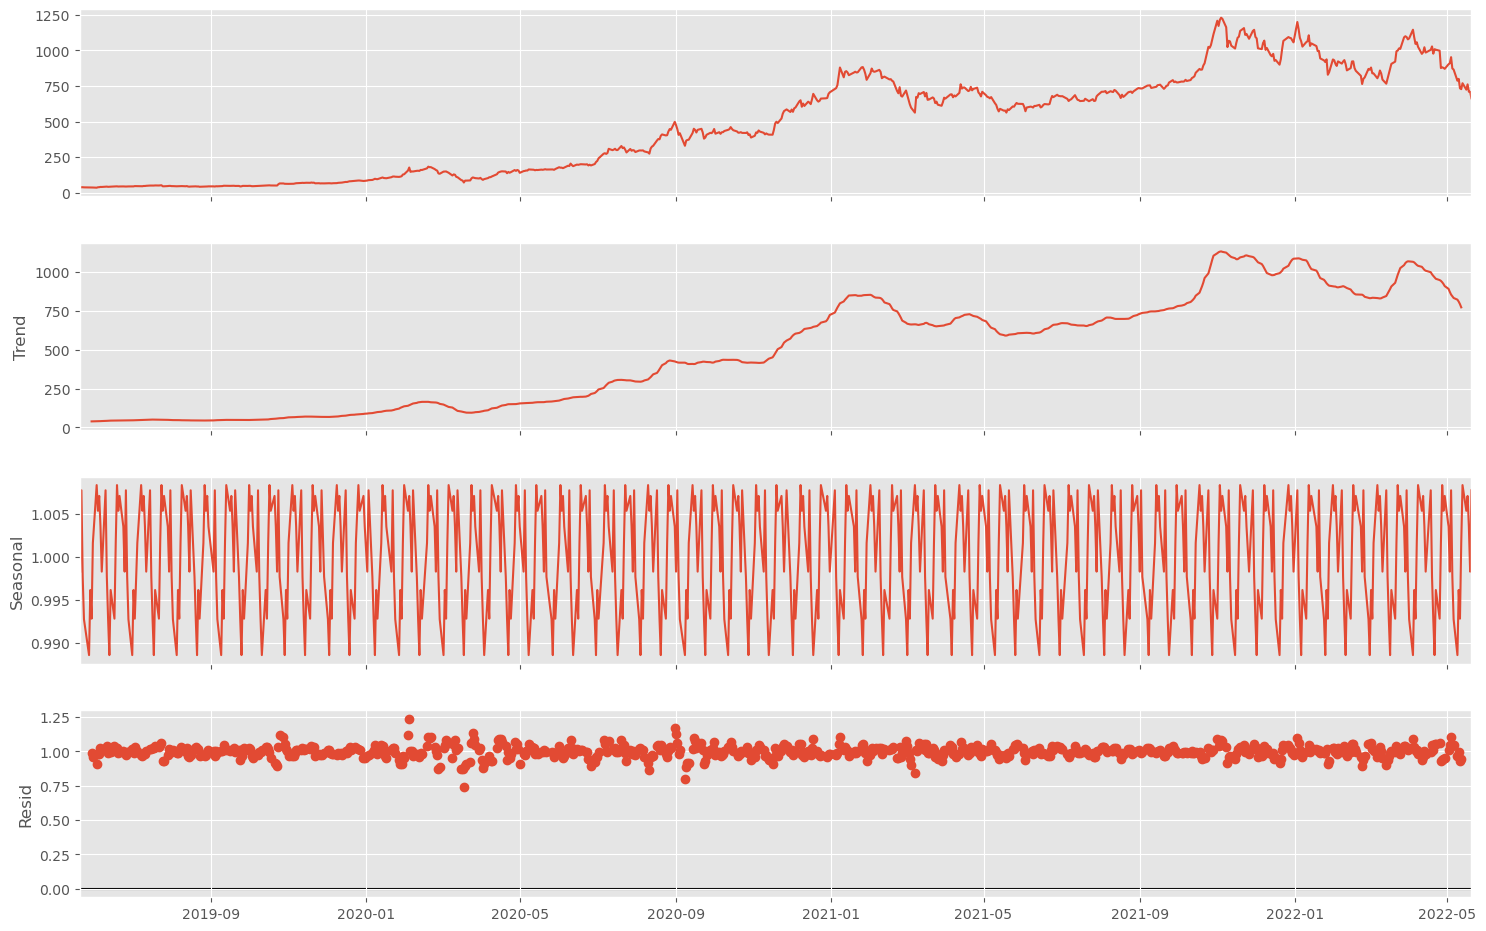

In [364]:
# Multiplicative
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12,model="multiplicative")

fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)


#### **Checking for outliers**

<Axes: ylabel='Close'>

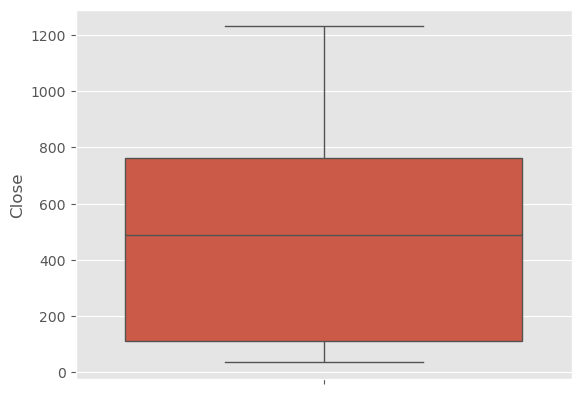

In [319]:
# Checking for Outliers
import seaborn as sns
sns.boxplot(stock_data.Close)

- Data has no outliers

ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) are statistical tools used in time series analysis to identify relationships between observations in a time series dataset.

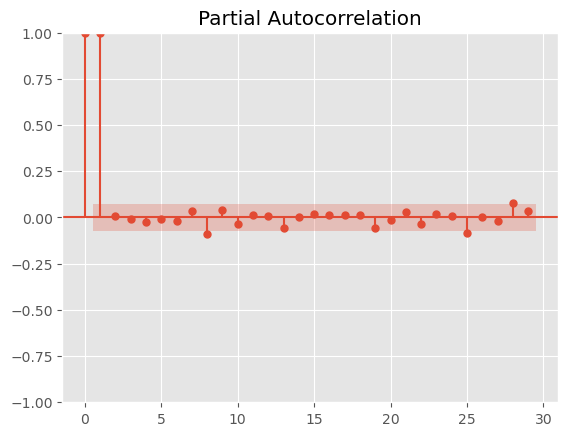

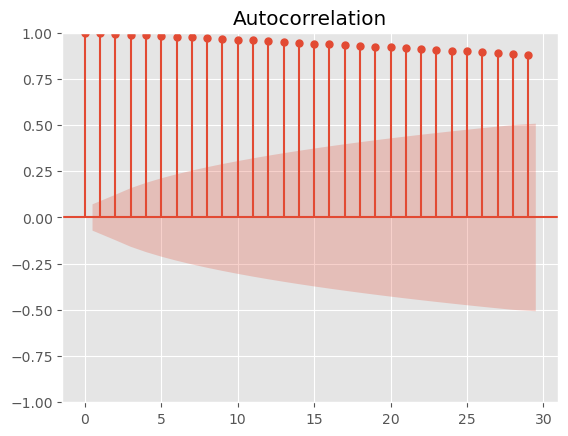

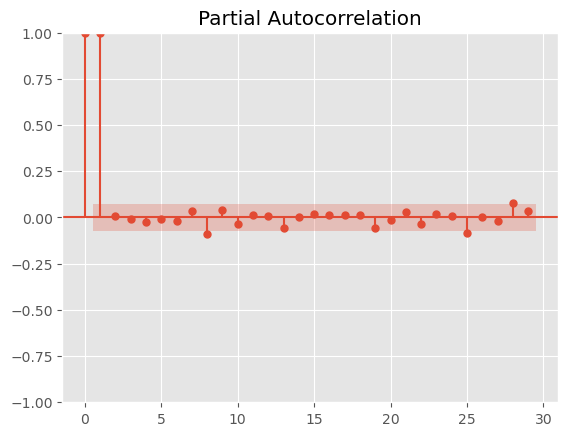

In [365]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

#### **Data Transformation**

Converting Non-Stationary data into stationary data

In [322]:
df_close = df_close.diff()
df_close=df_close.dropna()

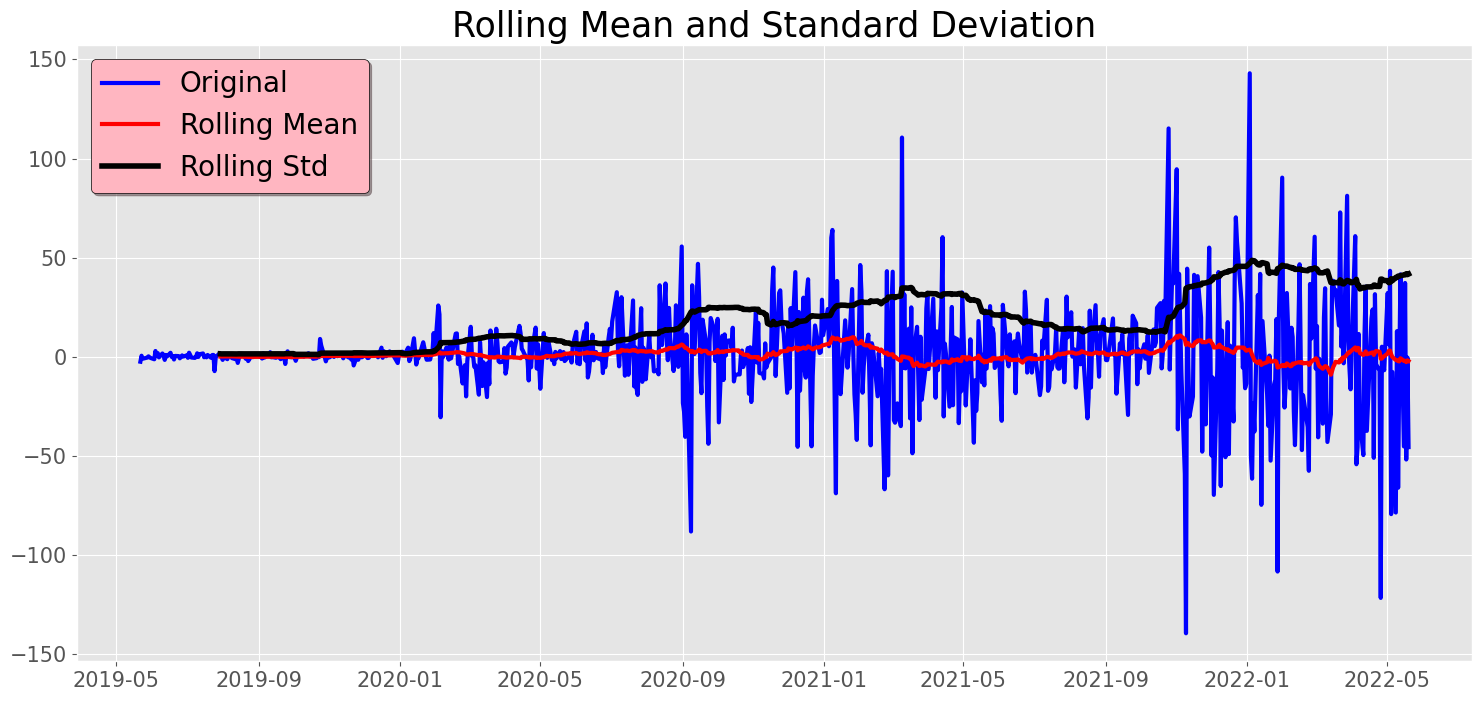

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [323]:
test_stationarity(df_close)

- Now our data is stationary.
- Hence, will reject the null hypothesis

## **Model Building**

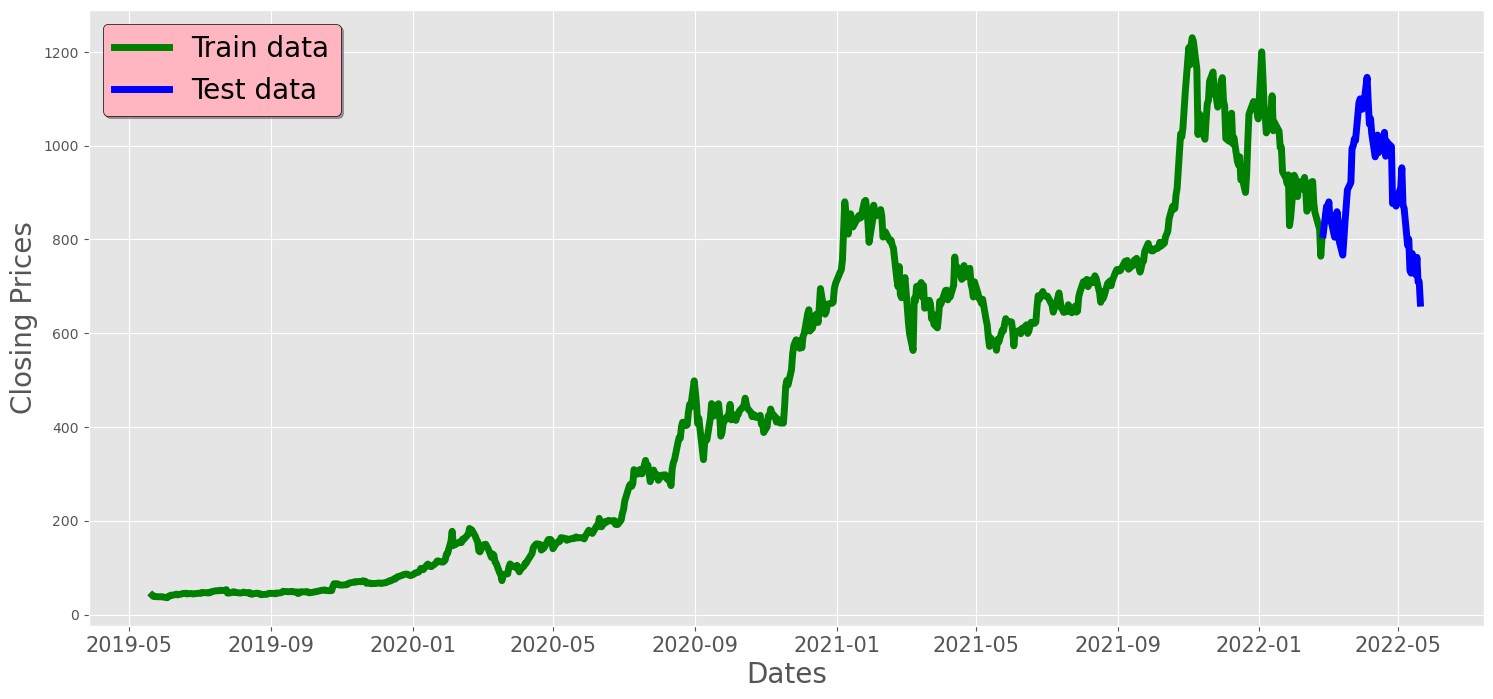

In [326]:
## Splitting data into training and testing dataset

train_data = df_close[0:-60]
test_data  = df_close[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Closing Prices', fontsize=20)
plt.xticks(fontsize=15)
plt.plot(train_data, "green", label='Train data', linewidth=5)
plt.plot(test_data, 'blue', label='Test data', linewidth=5)
plt.legend(fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')

#### **Applying ARIMA Model on the Time Series**

In [327]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [328]:
history=[x for x in train_data]

In [329]:
model=ARIMA(history,order=(1,1,1))

In [330]:
model=model.fit()

In [331]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Sun, 15 Dec 2024   AIC                           6306.700
Time:                        19:26:27   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [332]:
model.forecast()[0]

800.2043838663046

In [333]:
test_data[0]

809.8699951171875

In [334]:
mean_squared_error([test_data[0]],model.forecast())

93.42404085319363

In [335]:
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

9.665611250882876

In [336]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [337]:
def evaluate_models(data, test, p_values, d_values, q_values):
    data = data.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(data, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print("Best ARIMA%s RMSE=%.3f" %(best_cfg, best_score))


In [338]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=457.414
ARIMA(0, 0, 1) RMSE=241.164
ARIMA(0, 0, 2) RMSE=161.913
ARIMA(0, 1, 0) RMSE=39.516
ARIMA(0, 1, 1) RMSE=39.482
ARIMA(0, 1, 2) RMSE=39.617
ARIMA(0, 2, 0) RMSE=57.835
ARIMA(0, 2, 1) RMSE=39.611
ARIMA(0, 2, 2) RMSE=39.580
ARIMA(1, 0, 0) RMSE=39.477
ARIMA(1, 0, 1) RMSE=39.449
ARIMA(1, 0, 2) RMSE=39.584
ARIMA(1, 1, 0) RMSE=39.475
ARIMA(1, 1, 1) RMSE=39.555
ARIMA(1, 1, 2) RMSE=39.935
ARIMA(1, 2, 0) RMSE=46.184
ARIMA(1, 2, 1) RMSE=39.573
ARIMA(1, 2, 2) RMSE=39.731
ARIMA(2, 0, 0) RMSE=39.440
ARIMA(2, 0, 1) RMSE=39.494
ARIMA(2, 0, 2) RMSE=39.598
ARIMA(2, 1, 0) RMSE=39.635
ARIMA(2, 1, 1) RMSE=39.759
ARIMA(2, 1, 2) RMSE=39.658
ARIMA(2, 2, 0) RMSE=45.781
ARIMA(2, 2, 1) RMSE=39.739
ARIMA(2, 2, 2) RMSE=39.733
Best ARIMA(2, 0, 0) RMSE=39.440


In [346]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(2,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 39.43995729937915


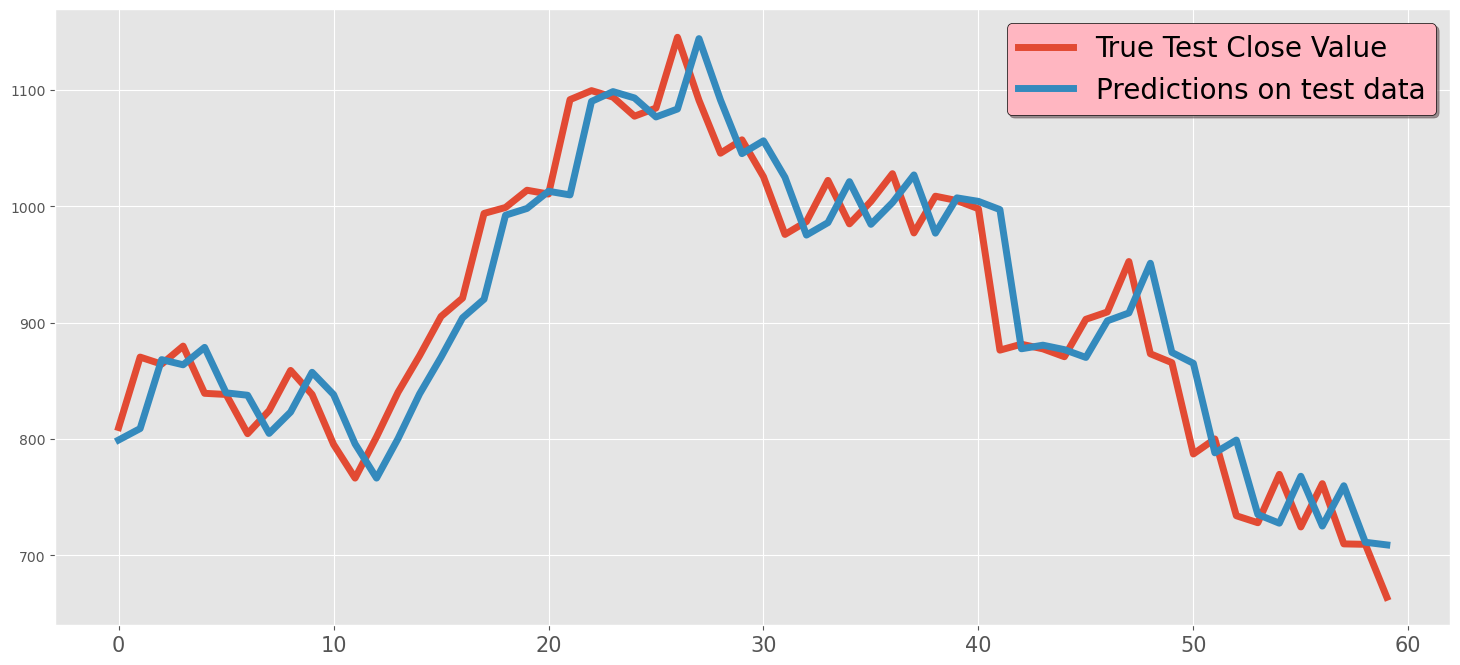

In [347]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [348]:
fc_series = pd.Series(predictions, index=test_data.index)

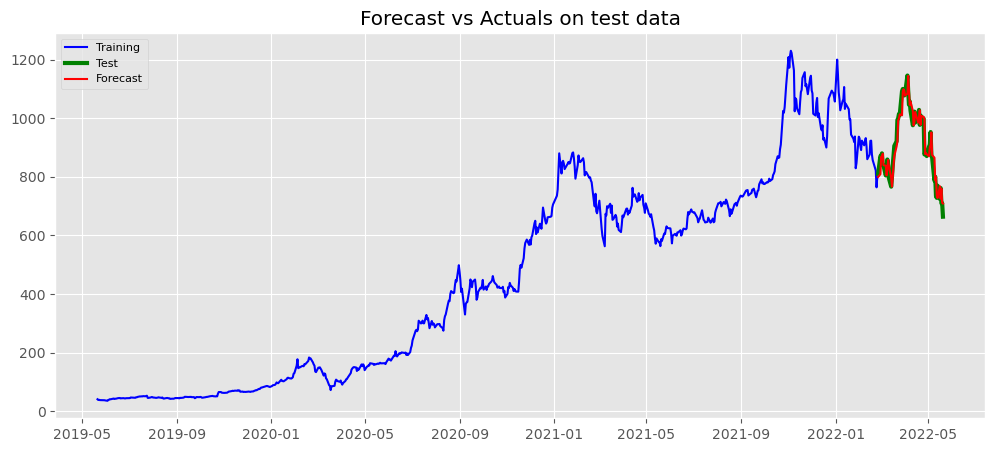

In [349]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

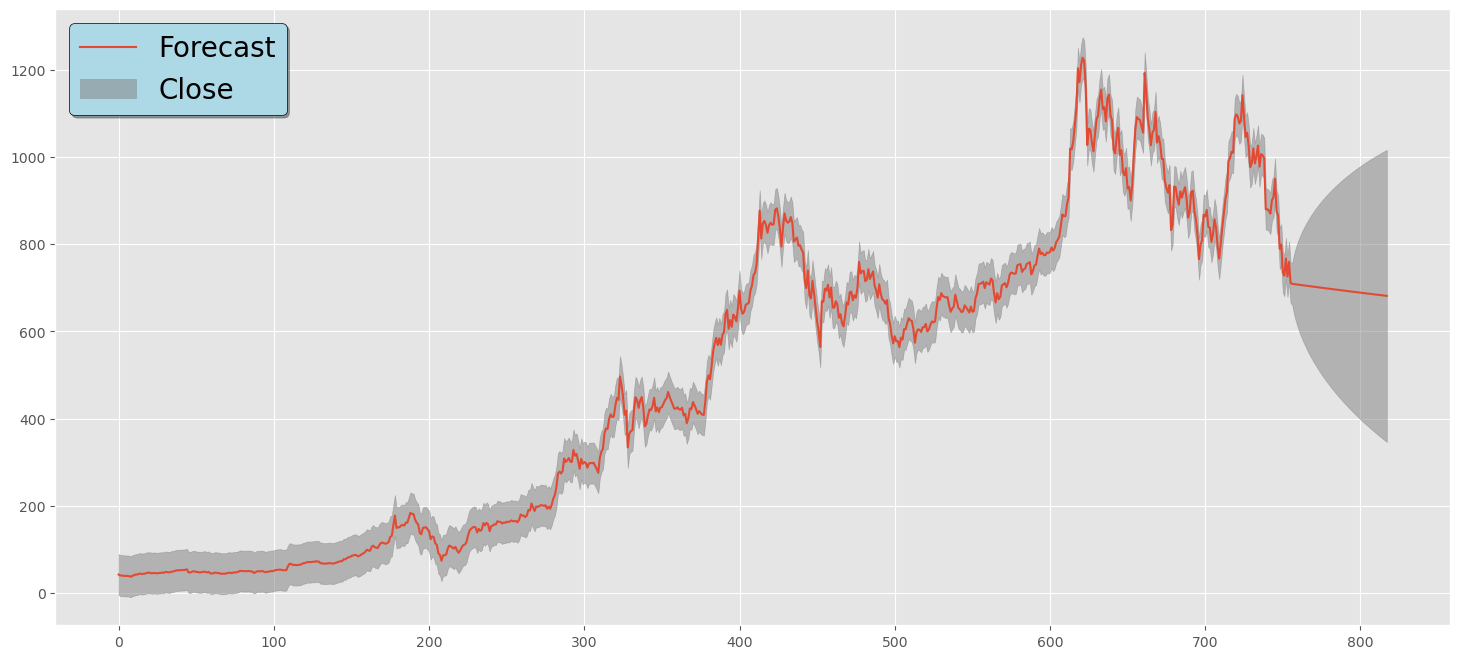

In [350]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

#### **Applying SARIMA Model on the Time Series**

In [351]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 39.739481948001675


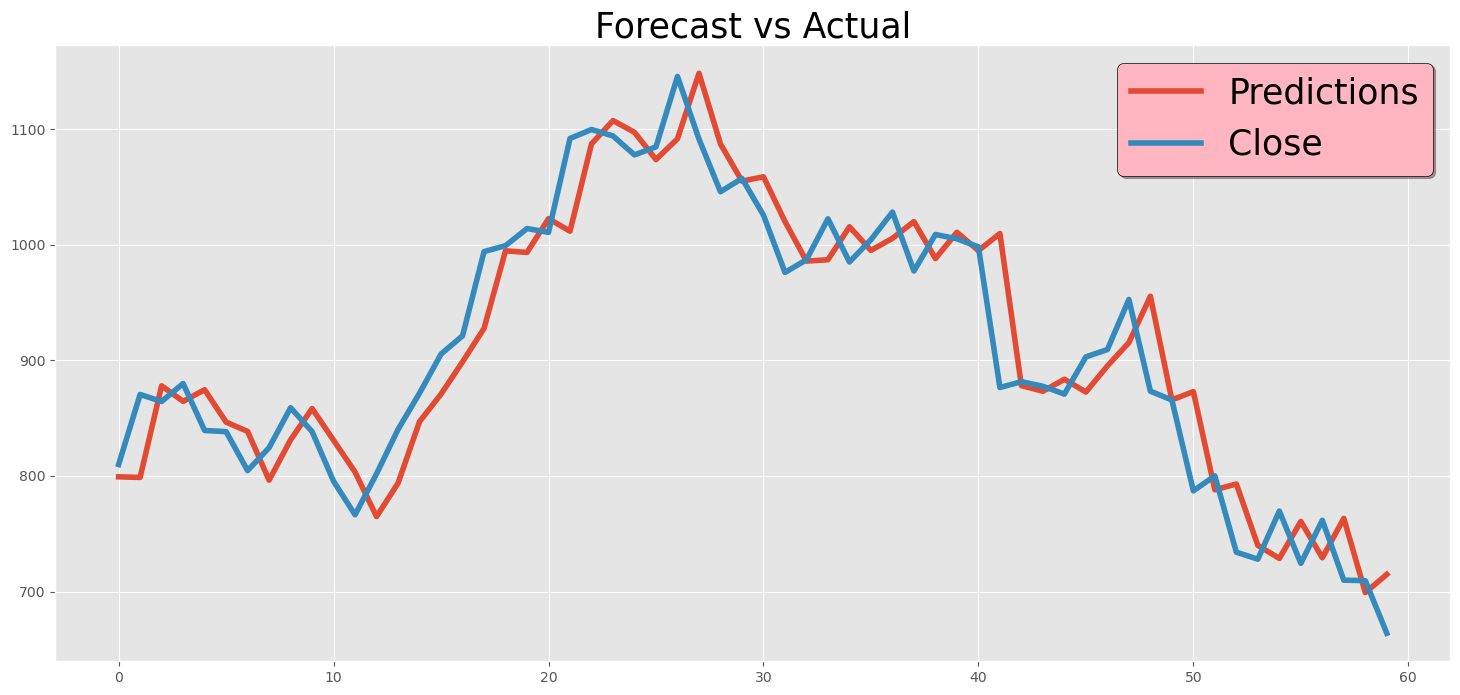

In [352]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')